<a href="https://colab.research.google.com/github/suy379/do_it_DL_intro/blob/main/08_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98)%2B%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95%2C_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08. 합성곱 신경망
- 08-1. 합성곱 연산 개념+예시
- 08-2. 풀링 연산 개념+예시
- 08-3. 합성곱층에 적용되는 렐루(ReLu) 함수 & 합성곱 신경망의 구조
- 08-4. 합성곱 신경망 손코딩
- 08-5. 합성곱 신경망 using Keras

## 08-1. 합성곱 연산
### 합성곱 연산(간단히 합성곱이라고 부름) --> __convolve__
- 배열 x, w가 있을 때, 두 배열 중 원소수가 적은 배열 w의 원소 순서를 뒤집는다.(w_r) --> x가 실제 데이터 샘플, w가 가중치 행렬임.
- w_r을 배열 x의 왼쪽 끝부터 시작하여 x의 오른쪽 끝에 도달할 때까지 원소별 곱셈을 수행한다.
- 반환값: 곱셈으로 출력된 값들 array

In [ ]:
# 합성곱 구현하기
import numpy as np
w = np.array([2,1,5,3])
x = np.array([2,8,3,7,1,2,0,4,5])
w_r = np.flip(w)
print(w_r) #원소 수가 더 적은 w의 원소 순서를 뒤집은 것.

[3 5 1 2]


In [ ]:
#또는 다음도 가능
w_r = w[::-1]
print(w_r)

[3 5 1 2]


In [ ]:
#넘파이 점 곱으로 합성곱 수행하기
for i in range(6):
    print(np.dot(x[i:i+4], w_r))

63
48
49
28
21
20


In [ ]:
#또는 scipy의 convolve 함수 사용
from scipy.signal import convolve
convolve(x, w, mode='valid') #그냥 x,w를 넣으면 됨. 

array([63, 48, 49, 28, 21, 20])

### 교차상관 연산(간단히 교차상관이라고 부름) --> 앞으로 __correlate__만 사용!
- 대부분의 딥러닝 패키지들은 합성곱 신경망을 만들 때 합성곱이 아니라 교차상관을 사용함.
- 교차상관은 합성곱과는 달리 w를 뒤집지 않고 곱함.

In [ ]:
from scipy.signal import correlate
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

### 패딩(padding) & 스트라이드(stride)
- 패딩은 원본 배열의 양 끝에 빈 원소를 추가하는 것
- 스트라이드는 미끄러지는 배열의 간격을 조절하는 것(몇 번 띄우고 미끄러질 것인가?)
---
- _패딩 개념_ 을 이용해, 1)밸리드 패딩 / 2)풀 패딩 / 3)세임 패딩을 만들 수 있다.
- 합성곱 신경망에선 대부분 원본배열 길이와 출력배열 길이가 동일한 __세임 패딩__을 주로 사용한다.
- 합성곱 신경망에선 보통 __스트라이드=1__로 지정

In [ ]:
#밸리드 패딩(제로 패딩을 사용하지 않는 기본)
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [ ]:
#풀 패딩(제로 패딩을 사용해 모든 원소의 연산참여도를 동일하게 만듦)
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [ ]:
#세임 패딩(모든 원소 연산참여도가 같진 않지만, 원본배열 길이와 출력배열 길이가 동일해짐)
correlate(x, w, mode='same') #x배열 길이:9, 출력된 배열 길이:9

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

- 지금까지는 그냥 x,w배열 모두 1차원이었으나 실전에선 2차원 배열을 주로 쓰기 때문에  __2차원 배열에서 합성곱을 수행__ 해보자.
- x, w 모두 2차원 배열

In [ ]:
#밸리드 패딩
X = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]]) #2차원, 3x3
w = np.array([[2, 0], [0, 0]]) #2차원, 2x2

from scipy.signal import correlate2d #2차원이니까 2d 붙여줘야함.
correlate2d(X, w, mode='valid') #밸리드니까 x배열 길이: 3x3, 출력 배열 길이: 2x2(4번 수행)

array([[ 2,  4],
       [ 8, 10]])

In [ ]:
#세임 패딩(출력 배열 길이랑 같아야 하니까 9번 수행하면 됨!)
correlate2d(X, w, mode='same') #출력 배열 길이: 3x3(9번 수행)

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

### 텐서플로를 이용해 합성곱 수행하기 -> 입력 데이터 4차원, `conv2d` 함수 사용
- 원본 배열(입력, X), 미끄러지는 배열(가중치, w) 은 일반적으로 4차원 배열
- X는 (배치, 샘플높이, 샘플너비, 컬러채널 차원) => (2, 3, 3, 3)
- w는 (가중치높이, 가중치너비, 컬러채널 차원, 가중치 개수) => (2, 2, 3, 3)
- 출력 배열은 (X의 배치, X의 높이, X의 너비, 가중치 개수) => (2, 3, 3, 3)

In [ ]:
#앞서 만든 X, w를 4차원 배열로 바꿔 수행 
import tensorflow as tf
x_4d = X.astype(np.float).reshape(1, 3, 3, 1)
w_4d = w.reshape(2, 2, 1, 1,)

In [ ]:
#세임 패딩, 스트라이드 1
c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME') #텐서 형태로 출력 -> 넘파이로 변환
c_out

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float64, numpy=
array([[[[ 2.],
         [ 4.],
         [ 6.]],

        [[ 8.],
         [10.],
         [12.]],

        [[14.],
         [16.],
         [18.]]]])>

In [ ]:
c_out.numpy().reshape(3,3) #결과는 scipy로 한것과 동일.

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

## 08-2. 풀링 연산 
- 합성곱 신경망에선 _합성곱이 일어나는 층: 합성곱층_, _풀링이 일어나는 층: 풀링층_ 이라고 한다. 각 층에서 반환되는 값은 __특성 맵__이다.
- __풀링__ 이란, 특성 맵을 스캔하며 최댓값을 고르거나(최대 풀링), 평균값을 계산하는 것(평균 풀링)을 의미한다. -->이렇게 하여 특성 맵 크기를 1/2로 줄임.
- 보통 이미지 분류 시엔 특성 맵의 가장 큰 특성을 유지시키는 __최대 풀링__을 선호한다.

In [ ]:
#최대 풀링 수행
X = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12],
              [13,14,15,16]]) #4x4의 2차원 형태 
x = X.reshape(1, 4, 4, 1) #텐서플로에 적용하려면 4차원으로 바꿔야 함!

In [ ]:
#텐서플로의 최대 풀링 수행: max_pool2d 이 안에 풀링크기(ksize), 스트라이드 크기(strides)에 넣어주면 됨.
p_out = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='VALID') #최대풀링 후 나오는 특성맵을 2x2로 바꾸고 싶을 때.
p_out

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[ 6.],
         [ 8.]],

        [[14.],
         [16.]]]], dtype=float32)>

In [ ]:
#좀더 알아보기 쉽게 넘파이로 변경
p_out.numpy().reshape(2,2)

array([[ 6.,  8.],
       [14., 16.]], dtype=float32)

## 08-3. 합성곱층에 사용되는 ReLu 함수 & 합성곱 신경망의 구조 알아보기

In [ ]:
#렐루 함수 구현
def relu(x):
    return np.maximum(x, 0)

In [ ]:
x = np.array([-1, 2, -3, 4, -5, 0])
print(relu(x))

[0 2 0 4 0 0]


In [ ]:
#텐서플로우에서 제공하는 렐루 함수: relu(x)
r_out = tf.nn.relu(x)
r_out.numpy() #텐서 객체 -> 넘파이로 바꿔서 출력

array([0, 2, 0, 4, 0, 0])

## 08-4. 합성곱 신경망 만들기
- 여기선 모두 순수 파이썬만으로 구현하진 않고, _텐서플로가 제공하는 합성곱 함수 & 자동 미분 기능_ 을 이용하여 만든다.
- 정방향 계산: forpass(합성곱 연산, 렐루 적용, 풀링) --> Z2 반환
- 역방향 메서드 필요x ->그냥 텐서플로의 자동미분기능 활용, training 메서드에 흡수 
- 학습 메서드: init_weights(glorot_uniform으로 초깃값 설정), fit(epoch문 수행+loss 추가), training(Z2 계산, loss 계산, 그레디언트 업데이트) <- gen_batch 메서드로 batch_size만큼 뽑아서 학습.

In [3]:
import tensorflow as tf
import numpy as np

x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape: #with 안에는 미분할 대상을 입력.(이 자체를 'tape'으로 명명)
    y = x**3 + 2*x + 5

In [4]:
print(tape.gradient(y, x)) #y를 x에 대해 미분 

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [5]:
import tensorflow as tf
import numpy as np

class ConvolutionNetwork:

    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels
        self.optimizer = None #추후 설정(텐서플로 옵티마이저)
        self.conv_w = None
        self.conv_b = None
        self.units = units
        self.batch_size = batch_size
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        self.losses = [] #에포크별 train_loss 저장
        self.val_losses = [] #에포크별 val_loss 저장 
        self.lr = learning_rate

    # 정방향 메서드(Z2 출력)
    def forpass(self, x): 
        #합성곱 연산 
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        #렐루 적용
        r_out = tf.nn.relu(c_out)
        #풀링 적용
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        #출력 일렬로 펼치기 
        f_out = tf.reshape(p_out, [x.shape[0], -1]) #입력 배치 부분만 남기고 나머지값은 하나로 펼침.(묶어버림)
        #기존의 정방향 계산 수행
        z1 = tf.matmul(f_out, self.w1) + self.b1
        a1 = tf.nn.relu(z1)
        z2 = tf.matmul(a1, self.w2) + self.b2
        return z2 

    def init_weights(self, n_classes):
        g = tf.initializers.glorot_uniform() #초깃값 설정 시 글로럿 초기화 
        #합성곱층의 값들 초기화 
        self.conv_w = tf.Variable(g((3,3,1,self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        #w1,b1,w2,b2 값 초기화 
        n_features = 14*14*self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)
        self.w2 = tf.Variable(g((self.units, n_classes)))
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)

    #loss 구하는 함수 새로 수정! 텐서플로 미분기능 활용해 더 간단하게~
    def get_loss(self, x, y): #안에 batch들과 x_val, y_val들 들어감.
        z = self.forpass(x)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

    def training(self, x, y):
        m = len(x)
        #loss 계산 + 그레디언트 업데이트
        with tf.GradientTape() as tape: #with 안에 미분할 대상을 넣으면 자동으로 계산해줌.
            z = self.forpass(x) #Z2 출력 
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z) #y와 z2값을 바탕으로 loss 계산 
            loss = tf.reduce_mean(loss) #loss가 총 배치수만큼(m개) 생기므로, 평균 loss 반환 

        weights_list = [self.conv_w, self.conv_b, self.w1, self.b1, self.w2, self.b2]
        grads = tape.gradient(loss, weights_list) #앞의 loss를 가중치 목록에 대해 미분한 값(그레디언트들) 저장 
        self.optimizer.apply_gradients(zip(grads, weights_list)) #그레디언트 업데이트 

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        #초기값 설정 
        self.init_weights(y.shape[1])
        self.optimizer = tf.optimizers.SGD(learning_rate = self.lr)
        #epoch만큼 반복
        for i in range(epochs):
            print('에포크', i, end=' ')
            #여기선 batch_loss값도 기록한다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x,y):
                print('.', end='')
                self.training(x_batch, y_batch) #배치만큼의 A2, loss, 그레디언트 업데이트 실행 
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            self.losses.append(np.mean(batch_losses)) #평균 train_loss
            self.val_losses.append(self.get_loss(x_val, y_val)) #평균 val_loss

    ## get_batch 메서드--> x,y가 들어오면 랜덤하게 batch_size만큼 x_batch, y_batch 뽑아 출력
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size #미니배치의 횟수 
        if length % self.batch_size: #나머지가 있다면 횟수 +1 
            bins +=1 
        #인덱스 랜덤 섞기
        indexes = np.random.permutation(np.arange(len(x)))
        x = x[indexes]
        y = y[indexes]
        #미니배치 횟수만큼 실행 
        for i in range(bins):
            #인덱스 설정하여 나눠줌 
            start = self.batch_size*i
            end = self.batch_size*(i+1)
            yield x[start:end], y[start:end] #x_batch, y_batch 반환. (return으로 해도 되는데 메모리 사용이 효율적인 제너레이터로 접근함.)

    ### 예측 & 평가 메서드 수정
    #예측 메서드--> 이 안에는 x_val만 넣는다.
    def predict(self, x):
        z = self.forpass(x) #Z2 반환 
        return np.argmax(z.numpy(), axis=1) #Z2의 각 행에서 가장 큰 값의 인덱스 반환-> 클래스 예측한 값과 동일! 
    
    # 평가 메서드-- 이 안에는 앞서 predict로 반환된 값과 y_val를 비교한 정확도를 출력.
    def score(self, x, y):
        return np.mean(self.predict(x) == np.argmax(y, axis=1)) 

In [6]:
#데이터 세트 불러오기
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
#train_all을 훈련셋, 검증셋으로 나누기
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
#타깃 원-핫 인코딩
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)
print(y_val.shape, y_val_encoded.shape)

(12000,) (12000, 10)


In [8]:
print(x_train.shape, x_val.shape)

(48000, 28, 28) (12000, 28, 28)


In [9]:
## 입력 데이터(X) 만들기: 배치x28x28x1 그대로 넣으면 된다!
## 여기서 컬러 채널의 경우 그 값은 없으나(컬럼이 더 있진않음.) 그냥 차원만 4차원으로 바꿔주는 것임.
x_train = x_train.reshape(-1, 28, 28, 1) #48000이라고 곧바로 쓰는것보다 -1로 써주는게 더 간편. 첫번째 차원은 얼마든 상관없기도 하고.
x_val = x_val.reshape(-1, 28, 28, 1)
print(x_train.shape, x_val.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


In [ ]:
print(x_val[0])

In [10]:
#X 대상 표준화 전처리 
x_train = x_train/255
x_val = x_val/255

In [ ]:
## 모델링
#객체 
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.1)
#훈련
cn.fit(x_train, y_train_encoded, epochs=20, x_val = x_val, y_val = y_val_encoded)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

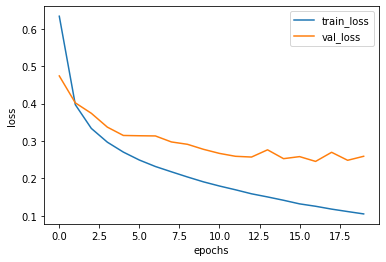

In [ ]:
#train loss vs. val loss 비교
import matplotlib.pyplot as plt

plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
#성능
cn.score(x_val, y_val_encoded)

0.9093333333333333

## 08-5. 케라스로 합성곱 신경망 만들기
- 앞서 08-4에서 직접 합성곱 신경망을 구현해 07장보다 더 좋은 성능을 냈지만, 실전에선 케라스와 같은 고수준 API를 이용하는 것이 성능이 훨씬 좋게 나온다.
- 3가지 단계를 거쳐 만듦(1: 합성곱층 쌓기, 2: 풀링층 쌓기, 3:완전 연결층 쌓기)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
#1: 합성곱층 쌓기
conv1 = Sequential()
conv1.add(Conv2D(10, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))

In [13]:
#2: 풀링층 쌓기
conv1.add(MaxPooling2D((2,2), strides=2, padding='valid')) #2x2 풀링을 기본값으로 지정하면 strides=2가 디폴트. 

In [14]:
#특성 맵 펼치기
conv1.add(Flatten())

In [15]:
#3: 완전 연결층 쌓기 - Dense
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [16]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [17]:
#모델 최적화 알고리즘, 손실함수 설정
conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#모델 훈련 
history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded), batch_size=128)

Epoch 1/20
375/375 [==============================] - 14s 38ms/step - loss: 0.2770 - accuracy: 0.8988 - val_loss: 0.2886 - val_accuracy: 0.8972
Epoch 2/20
375/375 [==============================] - 14s 37ms/step - loss: 0.2592 - accuracy: 0.9060 - val_loss: 0.2801 - val_accuracy: 0.9003
Epoch 3/20
375/375 [==============================] - 14s 38ms/step - loss: 0.2487 - accuracy: 0.9097 - val_loss: 0.2743 - val_accuracy: 0.9007
Epoch 4/20
375/375 [==============================] - 14s 38ms/step - loss: 0.2396 - accuracy: 0.9130 - val_loss: 0.2684 - val_accuracy: 0.9028
Epoch 5/20
375/375 [==============================] - 14s 38ms/step - loss: 0.2307 - accuracy: 0.9164 - val_loss: 0.2636 - val_accuracy: 0.9047
Epoch 6/20
375/375 [==============================] - 14s 38ms/step - loss: 0.2216 - accuracy: 0.9189 - val_loss: 0.2573 - val_accuracy: 0.9068
Epoch 7/20
375/375 [==============================] - 14s 38ms/step - loss: 0.2120 - accuracy: 0.9228 - val_loss: 0.2549 - val_accuracy:

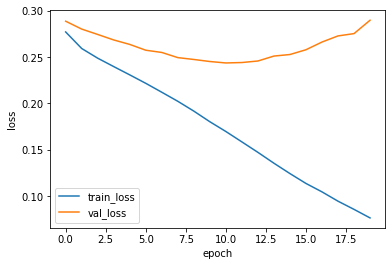

In [22]:
#train_loss vs. val_loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

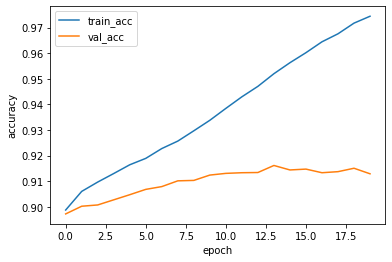

In [23]:
#train accuracy vs. val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [24]:
#성능 측정
loss, accuracy = conv1.evaluate(x_val, y_val_encoded)
print(accuracy)

375/375 [==============================] - 4s 9ms/step - loss: 0.2897 - accuracy: 0.9129
0.9129166603088379


- 케라스를 사용하여 val set에 대해 정확도가 92%로 크게 증가하긴 하였으나
- loss 그래프와 accuracy 그래프를 보면 epoch를 수행한 지 5번도 안되어 loss는 다시 증가하기 시작하고, 정확도도 더 이상 높아지지 않고 정체하였다. --> 즉, __과적합__이 발생하였다.
- 과적합을 막기 위해 __드롭아웃(Dropout)__ 사용! _드랍아웃은 모델 훈련시에만 적용한다._

In [25]:
from tensorflow.keras.layers import Dropout

conv2 = Sequential()
#순서대로 합성곱층-풀링층-(드랍아웃)-완전연결층
conv2.add(Conv2D(10, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
conv2.add(MaxPooling2D((2,2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [26]:
conv2.summary() #드롭아웃층은 훈련되는 가중치가 없고(파라미터 0) 텐서의 차원 변경x

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [27]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded), batch_size=128)

Epoch 1/20
375/375 [==============================] - 16s 41ms/step - loss: 0.8620 - accuracy: 0.7025 - val_loss: 0.3933 - val_accuracy: 0.8644
Epoch 2/20
375/375 [==============================] - 15s 41ms/step - loss: 0.4261 - accuracy: 0.8478 - val_loss: 0.3429 - val_accuracy: 0.8823
Epoch 3/20
375/375 [==============================] - 15s 40ms/step - loss: 0.3799 - accuracy: 0.8618 - val_loss: 0.3289 - val_accuracy: 0.8834
Epoch 4/20
375/375 [==============================] - 15s 41ms/step - loss: 0.3742 - accuracy: 0.8627 - val_loss: 0.3061 - val_accuracy: 0.8907
Epoch 5/20
375/375 [==============================] - 15s 41ms/step - loss: 0.3429 - accuracy: 0.8753 - val_loss: 0.2971 - val_accuracy: 0.8931
Epoch 6/20
375/375 [==============================] - 15s 41ms/step - loss: 0.3189 - accuracy: 0.8811 - val_loss: 0.2860 - val_accuracy: 0.8961
Epoch 7/20
375/375 [==============================] - 15s 41ms/step - loss: 0.3094 - accuracy: 0.8861 - val_loss: 0.2773 - val_accuracy:

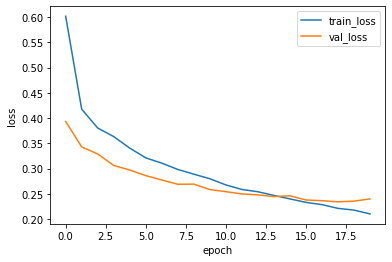

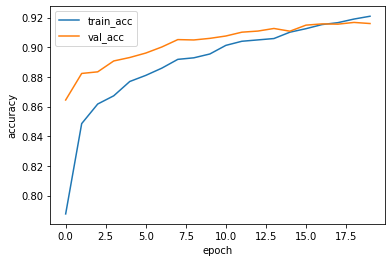

In [29]:
#train_loss vs. val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

#train accuracy vs. val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'])
plt.show()

- 과적합이 확실히 줄어들었단 것을 확인 가능(가장 좋은 성능일 때의 epoch가 늦춰짐, train set과 val set의 성능이 크게 차이나지 않음.)
- 보통 손실함수(loss)를 최소화하면 accuracy가 증가할 것으로 생각되나 __반드시 그렇지는 않다.__

In [30]:
#성능 측정
loss, accuracy = conv2.evaluate(x_val, y_val_encoded)
print(accuracy)

375/375 [==============================] - 3s 7ms/step - loss: 0.2399 - accuracy: 0.9160
0.9160000085830688
